# Measuring contour lines from Gaussian peaks using scikit-image
## last revision (2018-08-27)
The multivarite normal distribution implements the general formula
\begin{align}
\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \bigl(\text{det}(2\pi\boldsymbol{\Sigma})\bigl)^{-1/2}
\exp\left(
-\dfrac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \, \boldsymbol{\Sigma}^{-1} \, (\boldsymbol{x}-\boldsymbol{\mu})
\right)
\end{align}
for an input vector $\boldsymbol{x}$.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

In [29]:
def multivariateNormal(x, mu, cov):
    v = x - mu
    invCov = np.linalg.inv(cov)
    exponent = np.matmul(invCov, v)
    exponent = np.matmul(v.T, exponent)
    prefactor = 1.0 / np.sqrt(np.linalg.det(2.0 * np.pi * cov))
    return prefactor * np.exp(-exponent / 2.0)

In [30]:
def create_2D_Gaussian_data(mu, cov, nVisPoints = 100):
    
    # create 2D Gaussian peak
    x, y = np.meshgrid(np.linspace(-3.0, 3.0, nVisPoints), 
                       np.linspace(-3.0, 3.0, nVisPoints))
                       
    z = np.zeros((nVisPoints, nVisPoints))
    
    # fill z array
    for i in range(nVisPoints):
        
        for j in range(nVisPoints):
        
            p = np.zeros((2,))
            p[0], p[1] = x[0, i], y[j, 0]
            
            z[i, j] = multivariateNormal(p, mu, cov)
    
    return z

In [31]:
    # Example A
    # set mean (vector) and covariance (matrix)
    mu = np.zeros((2,))
    cov = np.zeros((2, 2))
    cov[0, 0] = 1.0
    cov[1, 1] = 1.0
    zA = create_2D_Gaussian_data(mu, cov)
    
    # measure the contour
    contourlevel = 0.1
    contoursA = measure.find_contours(zA, contourlevel)   

In [32]:
    # Example B
    # set mean (vector) and covariance (matrix)
    mu = np.zeros((2,))
    cov = np.zeros((2, 2))
    cov[0, 0] = 1.0
    cov[0, 1] = 3.0 / 5.0
    cov[1, 0] = 3.0 / 5.0
    cov[1, 1] = 2.0
    
    zB = create_2D_Gaussian_data(mu, cov)
    
    # measure the contour
    contourlevel = 0.1
    contoursB = measure.find_contours(zB, contourlevel)   

In [33]:
    # Example C
    # set mean (vector) and covariance (matrix)
    mu = np.zeros((2,))
    cov = np.zeros((2, 2))
    cov[0, 0] = 4.0
    cov[0, 1] = -3.0
    cov[1, 0] = -3.0
    cov[1, 1] = 5.0
    
    zC = create_2D_Gaussian_data(mu, cov)
    
    # measure the contour
    contourlevel = 0.03
    contoursC = measure.find_contours(zC, contourlevel) 

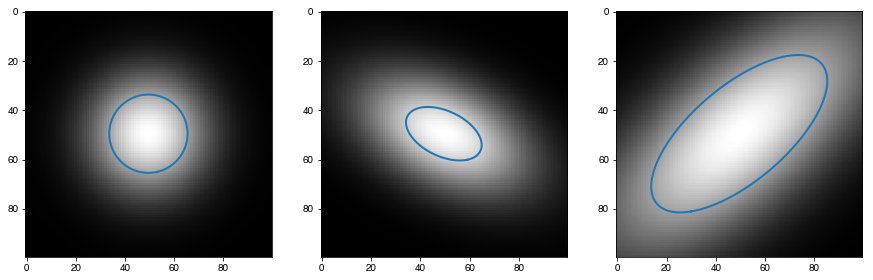

In [34]:
fig, ax = plt.subplots(1, 3)
    
fig.set_figheight(15)
fig.set_figwidth(15)
    
ax[0].imshow(zA, interpolation = 'nearest', cmap = plt.cm.gray)
ax[1].imshow(zB, interpolation = 'nearest', cmap = plt.cm.gray)
ax[2].imshow(zC, interpolation = 'nearest', cmap = plt.cm.gray)
    
for i, contour in enumerate(contoursA):
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth = 2.0)
        
for i, contour in enumerate(contoursB):
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth = 2.0)    
        
for i, contour in enumerate(contoursC):
    ax[2].plot(contour[:, 1], contour[:, 0], linewidth = 2.0)  